In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("./2020_Problem_D_DATA/fullevents.csv")
data[data['EventSubType'].isnull()==True]='Offside'
Events = data.groupby(['EventType', 'EventSubType']).size()
output = pd.DataFrame(Events)
output.to_csv('events.csv', index=True)

In [4]:
Players = pd.DataFrame(data.groupby(['OriginPlayerID']))[0]
MyPlayers = Players[Players.str.contains('Huskies')==True].tolist()
PlayersDict = {
    "Huskies_G1":0,
    "Huskies_D1":1,
    "Huskies_D2":2,
    "Huskies_D3":3,
    "Huskies_D4":4,
    "Huskies_D5":5,
    "Huskies_D6":6,
    "Huskies_D7":7,
    "Huskies_D8":8,
    "Huskies_D9":9,
    "Huskies_D10":10,
    "Huskies_M1":11,
    "Huskies_M2":12,
    "Huskies_M3":13,
    "Huskies_M4":14,
    "Huskies_M5":15,
    "Huskies_M6":16,
    "Huskies_M7":17,
    "Huskies_M8":18,
    "Huskies_M9":19,
    "Huskies_M10":20,
    "Huskies_M11":21,
    "Huskies_M12":22,
    "Huskies_M13":23,
    "Huskies_F1":24,
    "Huskies_F2":25,
    "Huskies_F3":26,
    "Huskies_F4":27,
    "Huskies_F5":28,
    "Huskies_F6":29
}
EventTypeList = pd.DataFrame(data.groupby(['EventType']))[0].tolist()
EventSubTypeList = pd.DataFrame(data.groupby(['EventSubType']))[0].tolist()

PlayerData = pd.DataFrame(index=PlayersDict.keys(), columns=EventSubTypeList, data=0)
N = data.shape[0]
for i in range(0,N):
    if (data['TeamID'][i] == 'Huskies'):
        try:
            PlayerData[data['EventSubType'][i]][PlayersDict[data['OriginPlayerID'][i]]] += 1
        except:
            print (str(data['EventType'][i]),i,end='\n')
# PlayerData

colormap = plt.cm.viridis
plt.figure(figsize=(24,22))
# sns.heatmap(PlayerData, linewidths=0.1, vmax=100, cmap=colormap, linecolor='white', annot=True, square=True)

<Figure size 2160x1584 with 0 Axes>

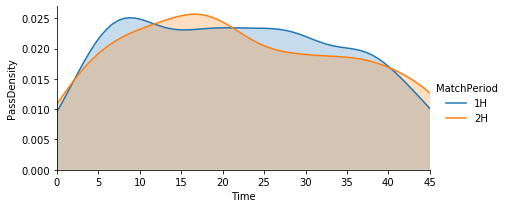

In [6]:
# pass Density
TimeData = data[data['MatchID']==1][data['EventType']=='Pass'][['MatchPeriod', 'EventTime', 'EventType']]
TimeData['EventTime'] /= 60.0

plt.figure(figsize=(30,22))
facet = sns.FacetGrid(TimeData, hue='MatchPeriod',aspect=2)
facet.map(sns.kdeplot,'EventTime',shade=True)
facet.set(xlim=(0, 45))
facet.add_legend()
facet.set_axis_labels('Time', 'PassDensity')
